<< [第三章：进入神经网络](Chapter3_Getting_started_with_neural_networks.ipynb) || [目录](index.md) || [第五章：计算机视觉中的深度学习](Chapter5_Deep_learning_for_computer_vision.ipynb) >>

# 第四章：机器学习基础 

> After three practical examples, you are starting to get familiar with how to approach
classification and regression problems using neural networks, and you have witnessed the
central problem of machine learning: overfitting. This chapter will formalize some of the
intuition you are starting to form into a solid conceptual framework for attacking and
solving deep learning problems.

经过了三个实践性的例子之后，你已经开始熟悉使用神经网络方法来解决分类和回归问题了，并且还亲身感受了机器学习中的核心问题：过拟合。本章会将你前面获得的感性认知转化为脑中扎实的概念性框架，来挑战和解决深度学习问题。

> In this chapter, you will:

> - Learn about more forms of machine learning, beyond classification and regression.
- Learn about formal evaluation procedures for machine learning models, a simple version
of which you have already seen in action a few times.
- Learn how to prepare data for deep learning, and what is "feature engineering".
- Learn ways to tackle the central problem of machine learning: overfitting, which we
faced in all of our three previous examples.

本章中，我们将：

- 了解机器学习的更多形式，除了分类和回归之外。
- 学习机器学习模型的正规验证方法，前面我们已经多次实际遇到过这个概念。
- 学习如何在深度学习中准备数据，以及什么叫做“特征工程”。
- 学习解决机器学习核心问题的方法：过拟合，这个问题在前面三个例子中我们都已经接触过。

> Finally, we will consolidate all these concepts—model evaluation, data preprocessing
and feature engineering, tackling overfitting—into a detailed 7-step workflow for
tackling any machine learning problem.

最后，我们会将所有这些概念 - 模型验证、数据预处理和特征工程、解决过拟合 - 总结成一个详细的7步工作流，用来解决所有的机器学习问题。

## 4.1 机器学习的四个类别

> Throughout our previous examples, you’ve become familiar with three specific types of
machine learning problems: binary classification, multi-class classification, and scalar
regression. All three are instances of "supervised learning", where the goal is to learn the
relationship between training inputs and training targets.

在前面的例子中，你已经熟悉了三种特定的机器学习问题：二分分类、多类别分类和标量回归。所有这三种问题都是“有监督学习”的例子，其目标是让模型能够学习获得训练输入和训练目标之间的关联关系。

> Supervised learning is just the tip of the iceberg. Machine learning is a vast field with
a complex subfield taxonomy. Machine learning algorithms generally fall into four broad
categories:

有监督学习仅仅是冰山一角。机器学习实际上是一个包含了很多复杂子范围的广泛领域。机器学习算法通常可以分为下面四个类别：

### 4.1.1 有监督学习

> This is by far the most common case. It consists of learning to map input data to known
targets (also called annotations), given a set of examples (often annotated by humans).
All four examples you’ve encountered in this book so far were canonical examples of
supervised learning. Generally, almost all applications of deep learning that are getting
the spotlight these days belong in this category, such as optical character recognition,
speech recognition, image classification or language translation.

这是目前为止最常见的场景。它学习从数据数据到已知目标（也称为标记）之间的映射关系，通过在给定一组样本（通常由人来进行标记）的基础上进行。本书中前面介绍的所有四个例子都是有监督学习。更普遍来说，进来深度学习领域受到关注的应用基本上也都是这个类别，例如光学字母辨识、语音识别、图像分类和机器翻译。

### 4.1.2 无监督学习

> This one consists of finding interesting transformations of the input data without the help
of any targets, for the purposes of data visualization, data compression, data denoising...
or simply to better understand the correlations present in the data at hand. Unsupervised
learning is the bread and butter of "data analytics", and is often a necessary step in better
understanding a dataset before attempting to solve a supervised learning problem.
"Dimensionality reduction" and "clustering" are well-known categories of unsupervised
learning.

这个类别包含着从输入数据中找到有趣的转换形式，其中不需要任何目标的帮助，用来进行数据可视化、数据压缩、数据去噪......或者仅仅只是为了更好的理解手头数据的内在关联。无监督学习是“数据分析”的黄油加面包，并且经常是在试图解决有监督学习问题之前，用来更好理解数据集的必须步骤。“降维”和“聚类”是无监督学习中广为人知的类型。

### 4.1.3 自监督学习

> This is actually a specific instance of supervised learning, but it different enough that it
deserves its own category. Self-supervised learning is supervised learning without
human-annotated labels. There are still labels involved (since the learning has to be
supervised by something), but they are generated from the input data itself, typically
using a heuristic algorithm. You can think of it as supervised learning without any
humans in the loop. For instance, "autoencoders" are a well-known instance of
self-supervised learning, where the generated targets are... the input themselves,
unmodified. In the same way, trying to predict the next frame in a video given past
frames, or the next word in a text given previous words, would be another instance of
self-supervised learning (temporally supervised learning, in this case: supervision comes
from future input data). Note that the distinction between supervised, self-supervised and
unsupervised learning can be blurry sometimes—these categories are more of continuum
without solid frontiers. Self-supervised learning can be reinterpreted as either supervised
or unsupervised learning depending on whether you pay attention to the learning
mechanism or to the context of its application.

这实际上是有监督学习中的一个特定种类，但它又很特殊足以自立山头。自监督学习是不需要人工标记的有监督学习。虽然它还是需要标签（因为学习必须被某些指标监督），但是标签能够从输入数据中自动产生，通常使用的是启发性算法来生成。你可以将它想象成在整个循环中不需要人类参与的有监督学习。例如，“自动编码器”就是一种自监督学习，它能自动产生目标...与输入一模一样的目标。同样的，在视频中根据前面帧的内容预测下一帧，或者在文本中根据前面的单词预测下一个单词，也是自监督学习的例子（瞬时性有监督学习，这里的监督来自未来的输入数据）。注意有监督学习、自监督学习和无监督学习可能会是很模糊的 - 这些类别更像是连续的而非有着明确边界的。自监督学习可以被重新解读为有监督学习或者无监督学习，取决于你着重研究的是学习的机制还是应用的上下文方面。

### 4.1.4 强化学习

> Long overlooked, this branch of machine learning has recently started getting a lot of
attention, after Google DeepMind successfully applied it to learning to play Atari games
(and later, to learning to play Go at the highest level). In reinforcement learning, an
"agent" receives information about its environment and learns to pick actions that will
maximize some reward. For instance, a neural network that "looks" at a video game
screen and outputs game actions in order to maximize its score can be trained via
reinforcement learning. Currently, reinforcement learning is mostly a research area and
has not yet had significant practical successes beyond games. In time, however, I would
expect to see reinforcement learning take over an increasingly large range of real-world
applications—self-driving, robotics, resource management, education... It is an idea
whose time has come, or will come soon.

这种机器学习类别曾经长期被忽视，最近开始得到了相当多的关注，特别是自从Google DeepMind将其成功的应用到了计算机学习进行Atari游戏（还有就是后来学习成为了超人类的围棋算法）之后。在强化学习中，存在一个“agent”用来从环境中获取信息然后学习选择能够最大化奖赏的行为。例如，一个神经网络可以“看见”视频游戏画面然后输出相应的游戏动作，目标是为了最大化获得高分，这就可以使用强化学习。目前强化学习还大多只是研究领域而并没有在除了游戏之外的实践中获得重要的成功。然而待以时日，作者期待能看到强化学习会占领真实世界应用的广泛领域 - 自动驾驶、机器人、资源管理、教育......当时机成熟时，作者坚信时机肯定会成熟   。

> In this book, we will focus specifically on supervised learning, since it is by far the
dominant form of deep learning today, with a wide range of industry applications. We
will also take a briefer look at self-supervised learning in later chapters.

本书我们会集中在有监督学习上，因为它是目前机器学习应用中的统治者，在广泛范围的工业应用中得到了使用和验证。我们也会在后面的章节中对自监督学习作简要的介绍。

> Although supervised learning mostly consists of classification and regression, there
are more exotic variants as well:

> - Sequence generation (e.g. given a picture, predict a caption describing it). Sequence
generation can sometimes be reformulated as a series of classification problems (e.g.
repeatedly predicting the word or token in a sequence).
- Syntax tree prediction (e.g. given a sentence, predict its decomposition into a syntax
tree).
- Object detection: given a picture, draw a bounding box around certain objects inside the
picture. This can also be expressed as a classification problem (given many candidate
bounding boxes, classify the contents of each one) or as a joint classification and
regression problem, where the bounding box coordinates are being predicted via vector
regression.
- Image segmentation: given a picture, draw a pixel-level mask on a specific object.
- etc...

虽然有监督学习通常就是分类和回归，但是它也有一些很有趣的变体：

- 序列生成（例如给定照片，预测描述照片的说明）。序列生成有时能被重定义为一系列的分类问题（例如重复的在一个序列中预测单词或符号）。
- 语法树预测（例如给定一个句子，预测它解构成语法树的形式）。
- 目标检测：给定照片，在其中某个特定目标上绘制方框。这也可以被表达成为一个分类问题（给定很多个可选的方框，对每个其中的内容进行分类）或者一个分类和回归问题的联合体，其中方框所在的坐标点是通过矢量回归预测得到的。
- 图像分割：给定照片，在特定目标之上绘制像素级的遮盖。
- 等等......

### 4.1.5 分类和回归问题术语词汇表

> Classification and regression involve many specialized terms. You have already come
across some of them in our first examples, and you will see more of them come up in the
following chapters. They have precise, machine-learning specific definitions, and you
should be familiar with them.

分类和回归包含着很多特定的术语。在我们前面那些例子中，你已经看到了其中的一些，后续章节内容中还会出现更多的相关术语。它们都有着机器学习特定的精确定义，你应该熟悉它们。

> Sample, or input : one data points that goes into your model.

样本，或者叫输入：代入到你模型中的一个数据点。

> Prediction, or output : what goes out of your model.

预测，或者叫输出：从你的模型得到的结果。

> Target: the truth. What your model should ideally have predicted, according to an
external source of data.

目标：真实结果。你的模型理想情况下应该得到的预测，这些目标都是通过外部数据得到的。

> Prediction error, or loss value : a measure of the distance between you model’s
prediction and the target.

预测误差，或者叫损失值：在你的模型预测和目标之间距离的度量。

> Classes: set of possible labels to choose from in a classification problem, e.g. when classifying cat and dog pictures, "dog" and "cat" are the two classes.

类别：在分类问题中为样本选择的一组可能的标签，例如当从猫和狗的照片中分类时，“猫”和“狗”就是两个类别。

> Label: specific instance of a class annotation in a classification problem. For instance,
if picture #1234 is annotated as containing the class "dog", then "dog" is a label of picture
#1234.

标签：在分类问题中对某个特定类别所作的标记。例如照片序号1234被标记为类别“狗”，那么“狗”就是1234号照片的标签。

> Ground-truth, or annotations : all targets for a dataset, typically collected by humans.

基本事实，或者叫标记：一个数据集的所有目标集合，通常是由人工收集整理的。

> Binary classification: classification task where each input sample should be
categorized into two exclusive categories.

二分分类：指的是每个输入样本都应该被划分到两个互斥的类别之中的分类任务。

> Multi-class classification: classification task where each input sample should be
categorized into more than two categories: for instance, classifying handwritten digits is a
multi-class classification task.

多类别分类：指的是每个输入样本都应该被划分到多于两个的类别之中的分类任务，例如前面的手写数字识别就是一个多类别分类任务。

> Multi-label classification: classification task where each input sample can be assigned
multiple labels. For instance, a given image may contain both a cat and a dog, and should
be annotated both with the "cat" label and the "dog" label. The number of labels per
image is usually variable.

多标签分类：指的是每个输入样本都能被指定为多个标签的分类任务。例如，一个图像可能既包括猫也包括狗，因此可以被标记为“猫”标签以及“狗”标签。每张图像上标签的数量通常是可变的。

> Scalar regression: task where the target is a continuous scalar value. House price
prediction is a good example: the different target prices form a continuous space.

标量回归：指的是预测目标是一个连续标量的任务。前面的房价预测就是这样的例子，不同的目标价格构成了一个连续的空间。

> Vector regression: task where the target is a set of continuous values, e.g. a
continuous vector. If you are doing regression against multiple values (e.g. the
coordinates of a bounding box in an image) then your are doing vector regression.

矢量回归：指的是预测目标是一组连续值的任务，也就是一个连续的矢量。如果你针对多个值进行回归任务（例如图像上目标定位框的坐标点），那么你就应该使用矢量回归。

> Mini-batch or batch : a small set of samples that are being processed at once by the
model (typically between 8 and 128 samples). It is often a power of 2 in order to facilitate
memory allocation on GPU. When training, a mini-batch is used to compute a single
gradient descent update applied to the weights of the model.

小批量或批量：每次让模型处理一小部分的样本集（通常介于8和128个样本之间）。通常使用2的幂值作为批量样本数来适应GPU上显存的分布。在训练过程中，每个小批量样本都被用来计算一次梯度下降优化，并更新模型上的权重。

## 4.2 验证机器学习模型

> In the three examples we covered in the previous chapters, we split our data into a
training set, a validation set, and a test set. The reason why we did not evaluate our
models on the same data as they were trained on quickly became evident: after just a few
epochs, all three models started to overfit , which is to say that their performance on
never-seen-before data started stalling (or even worsening) compared to their
performance on the training data—which always go up as training progresses.

上一章的三个例子中，我们将整个数据集划分成了一个训练集、一个验证集和一个测试集。我们不在同一个数据集上对模型进行验证的原因是很明显的：仅仅经过几次迭代之后，前面的三个模型就开始出现过拟合，也就是说它的性能在从未见过的数据上开始停滞（甚至变差）了，而它在训练数据上的性能却是一直增加的。

> In machine learning, our goal is to achieve models that generalize , i.e. that perform
well on never-seen-before data, and overfitting is the central obstacle. We can only
control that which we can observe, so it is crucial to be able to reliably measure the
generalization power of our model. In the next sections, we will take a look at strategies
for mitigating overfitting and maximizing generalization. In the present section, we will
focus on how we can measure generalization, i.e. how to evaluate machine learning
models.

在机器学习中，我们的目标是让模型实现泛化，也就是说能够在从未见过的数据上表现良好，因此过拟合是比较严重的障碍。而我们只能对可观测的实验结果来控制训练过程，因此能够可靠的测量模型的泛化能力是十分重要的。在下面章节中我们会学习到抑制过拟合以及最大化泛化能力的策略。本小节我们重点关注我们如何测量泛化能力，也就是如何验证机器学习模型。

### 4.2.1 训练集、验证集和测试集

> Evaluating a model always boils down to splitting your available data into three sets:
training, validation, and test set. You train on the training data, and evaluate your model
on the validation data. Once your model is ready for prime time, you test it one final time
on the test data.

验证模型归结起来总是需要将可用的数据分成三个部分：训练集、验证集和测试集。在训练集上训练模型，在验证集上验证模型。一旦模型经过上述步骤并优化封装后，就可以最终在测试集上来测试模型的性能了。

> You may ask, why not simply have two sets, a training set and a test set? We would
train on the training data, and evaluate on the test data. Much simpler!

你可能会问，为什么不简单的分成两个集合，一个训练集和一个测试集？然后在训练集上训练在测试集上验证，多简单啊！

> The reason is that developing a model always involves tuning its configuration, e.g.
picking the number of layers or the size of the layers (what is called the
"hyperparameters" of the model, to distinguish them from the "parameters", which are
the network’s weights). You will do this tuning by using as feedback signal the
performance of the model on the validation data, so in essence this tuning is a form of
learning : a search for a good configuration in some parameter space. As a result, tuning
the configuration of the model based on its performance on the validation set can quickly
result in overfitting to the validation set , even though your model is never being directly
trained on it.

不这样做的原因是，当你开发一个模型时，你永远需要在过程中调整它的配置，例如模型的层数或者层的单元尺寸（这些被称为模型的“超参数”，用来与模型自身的权重“参数”作为区别）。你需要通过模型在验证数据上的性能表现来作为调整它们的依据，因此本质上这种调整也是一种形式的学习过程：在一些参数空间中搜索最佳的超参数配置。这个学习的结果就是，基于在验证集数据上的性能来调整模型的配置也会导致在验证集上的过拟合，即使在模型从未直接在它之上训练的情况下。

> Central to this phenomenon is the notion of "information leak". Every time you are
tuning a hyperparameter of your model based on the model’s performance on the
validation set, some information about the validation data is leaking into your model. If
you only do this once, for one parameter, then very few bits of information would be
leaking and your validation set would remain a reliable way to evaluate your model. But
if you repeat this many times, running one experiment, evaluating on the validation set,
modifying your model as a result, then you are leaking an increasingly significant amount
of information about the validation set into your model.

这个现象的重点是一种被称为“信息泄露”的问题。每次当你使用模型在验证集上的性能来调整它的超参时，验证数据中的一些信息就被泄露进入到你的模型当中。如果你只在一个参数上进行了一次调整，那么仅有极少量的信息被泄露到模型之中。但是如果你在一个实验中重复这个过程多次，在验证集上验证模型并依此修改模型，那么就会泄露大量的信息进入到你的模型当中。

> At the end of the day, you end up with a model that performs artificially well on the
validation data, because it is what you optimized it for. Since what you care about is
actually performance on completely new data, not the validation data, you need a
completely different, never-seen-before dataset to evaluate your model: the test dataset.
Your model shouldn’t have had access to any information about the test set, even
completely indirectly. If anything about model has been tuned based on test-set
performance, then your measure of generalization will be flawed.

最终，模型在你的干预之下会在验证数据上表现出良好的性能，因为这就是你调整超参的目的。因为你实际上关注的是它在全新的数据上的性能表现，而不是验证集，你需要一个完全不同的模型从未见过的数据集来检验模型：测试数据集。你的模型不应该与测试集的信息有任何的接触，即使是间接的接触也不允许。如果模型依据测试集性能做了任何的调整，你就破坏了整个泛化性测量的基础。

> Splitting your data into a training, validation, and test sets may seem straightforward,
but there are a few advanced ways to do it which can come when very few data
is available. Let’s review three classic evaluation recipes.

将数据分为训练集、验证集和测试集看起来虽然直接，但当手头的数据非常少的时候也有着一些高级的方法。我们来查看一下三种经典的验证配方。

### 4.2.2 简单的留出验证

> Set apart some fraction of your data as your test set. Train on remaining data, evaluate on
the test set. As you saw in the previous sections, in order to prevent information leaks,
you should not tune your model based on the test set, and therefore you should also
reserve a validation set.

从数据中分出一部分作为你的测试集。在剩下的数据上进行训练，然后使用测试集进行验证。正如上一节你看到的，为了避免信息泄露，你不应该基于测试集来调整模型，因此你应该再留出部分的验证集。

> Schematically, hold-out validation looks like this:

留出验证在原理上如下图：

![hold-out validation](imgs/f4.1.jpg)

图4-1 简单留出验证数据分割

> Here’s a simple implementation:

下面是其简单的实现：

译者注：下面是伪代码实现，无法运行。

In [ ]:
num_validation_samples = 10000

# 对数据进行重新洗牌通常都是有用的
np.random.shuffle(data)

# 分出验证集
validation_data = data[:num_validation_samples]
data = [num_validation_samples:]

# 分出训练集
training_data = data[:]

# 使用训练集训练模型，然后用验证集进行验证
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# 到这里，你开始根据验证性能调整模型超参
# 然后重新训练，再次调整.....直至满意

# 然后你已经完成了超参数调整，可以将训练集和验证集合起来对模型作最后一次训练
# 完成后在测试数据集上进行最后验证
model = get_model()
model.train(np.concatenate([training_data,
validation_data]))
test_score = model.evaluate(test_data)

> This is the simplest evaluation protocol, and it suffers from one flaw: if little data is
available, then your validation and test sets may contain too few samples to be
statistically representative of the data at hand. This is easy to notice: if different random
shuffling rounds of the data before splitting end up yielding very different model
performance measures, then you are having this issue. K-fold validation and iterated
K-fold validation are two ways to address this.

这种方法是最简单的验证方案，它有一个缺点：如果可用的数据很少，那么你的验证集和测试集可能包括很少的样本，它们将无法正确的表示样本空间。这很容易能被注意到：如果对样本数据进行不同的随机洗牌过程，会导致模型性能结果差异很大，就可以确认这是产生的原因了。K-折验证和迭代K-折验证是解决这个问题的两种方法。

### 4.2.3 K-折验证

> Split your data into K partitions of equal size. For each partition i , train a model on the
remaining N-1 partitions, and evaluate it on partition i . Your final score would then be
the averages of the K scores obtained. This method is helpful when the performance of
your model shows significant variance based on your train-test split. Like hold-out
validation, this method doesn’t exempt you from using a distinct validation set for model
calibration.

将数据均分为K个不同部分。对于每个分区i，使用其他的K-1个分区进行训练，然后在第i个分区上进行验证。最终的验证分数是K个验证分数的均值。这个方法在模型使用训练-测试划分情况下显示出较高方差的时候非常有帮助。像留出验证一样，这个方法仍然依赖于留出一个独立的验证集进行模型调整。

> Schematically, K-fold cross-validation looks like this:

K-折交叉验证原理上如下图：

![K-fold validation](imgs/f4.2.jpg)

图5-2 K-折验证

> Here’s a simple implementation:

下面是简单的实现：

译者注：伪代码，无法运行。

In [ ]:
k = 4
num_validation_samples = len(data) // k
np.random.shuffle(data)

validation_scores = []
for fold in range(k):
    # 分出第i个验证集
    validation_data = data[num_validation_samples * fold: num_validation_samples * (fold + 1)]
    
    # 剩下的数据部分全部用来作为训练集
    training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold + 1):]
    
    # 每个折都创建一个全新的网络，然后训练和验证模型，将验证分数加到分数列表中
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)

# 求出K折的平均验证分数
validation_score = np.average(validation_scores)
# 最后在除了测试集外的全部数据上重新训练一遍模型，最后得到测试分数
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

### 4.2.4 带随机洗牌的迭代K-折验证

> This one is for situations in which you have relatively little data available and you need
to evaluate your model as precisely as possible. I have found it to be extremely helpful in
Kaggle competitions. It consists of applying K-fold validation multiple times, shuffling
the data every time before splitting it K-ways. Your final score would be the average of
the scores obtained at each run of K-fold validation. Note that you end up training and
evaluating P * K models (where P is the number of iterations you use), which can very
expensive.

本方法适用于当你有相对很少的数据，而却需要尽可能精确的验证你的模型。作者发现它在Kaggle竞赛中非常有用。它包括将K-折验证应用多次，每次在应用K-折方法之前都将数据进行随机洗牌。最终的验证分数将会是多次K-折验证中的平均分数。注意这个方法中数据会被训练和验证 $P \times K$次（其中P是迭代的次数），这可能需要大量的计算资源。

### 4.2.5 需要记住的内容

> There are a few things to keep an eye out for when picking an evaluation protocol:

> - Data representativeness. You want your training set and test set to be both representative
of the data at hand; for instance if you are trying to classify images of digits, and you are
starting from an array of samples where the samples are ordered by their class, taking the
first 80% of the array as your training set and the remaining 20% as your test would
result in your training set only having classes 0-7 while your test set would only have
classes 8-9. This seems like a ridiculous mistake, but it’s surprisingly common. For this
reason, you should most likely randomly shuffle your data before splitting it into a
training and test set.
- The arrow of time. If you are trying to predict the future given the past (e.g. the weather
tomorrow, stock movements, and so on), you should not randomly shuffle your data
before splitting it, because that would create a "temporal leak": you model would
effectively be trained on data from the future. In such situations you should always make
sure that all data in your test set is posterior to the data in the training set.
- Redundancy in your data. If some data points in your data appear twice (fairly common
with real-world data), then shuffling the data and splitting it into a training set and a test
set will result in redundancy between the training and test set. In effect, you would be
testing on part of your training data, which is the worst thing you could do! Make sure
that your training sets and tests sets are disjoint.

当选择验证方法时，有如下需要牢记的要点：

- 数据代表性。你必须保证训练集和测试集都能够全面代表手头的样本空间；例如当你进行手写数字识别时，你获得的数据集的样本是按照它们的类别标签排序的，你将前80%的样本取出来作为训练集而剩下20%作为测试集，这会导致训练集中仅包含0-7的类别而测试集中仅包含8-9的类别。这看起来很滑稽，但其实这个错误经常犯。因此，在划分训练集和测试集之前你应该坚持对样本进行随机洗牌。
- 时间箭头。如果你在进行未来预测的任务（如明天的天气，股市变化等），你不应该对数据进行随机洗牌，因为这会造成“时间泄露”：模型会有效地从未来的数据中得到训练。在这种情况下你应该保证测试机中的数据在时间上都处于训练集数据之后。
- 数据冗余性。如果数据中的样本多次出现（真实世界中很常见），那么分训练集和测试集之前进行随机洗牌有可能会将冗余的样本分到训练集和测试集中。结果你会在部分的训练数据上对模型进行验证测试，这是你可能遇到的最糟糕的事情了！必须确保训练集和测试集必须是正交的。

## 4.3 数据预处理、特征工程和特征学习

> Besides model evaluation, an important question we must tackle before we dive deeper
into model development is the following: how to prepare the input data and targets before
feeding them into a neural network? Many data preprocessing and feature engineering
techniques are domain-specific (e.g. specific to text data or image data), and we will
cover those in the next chapters as we encounter them in practical examples. For now, we
will review the basics, common to all data domains.

除了模型验证，在我们深入学习开发模型之前还有一个重要的问题：在输入数据和目标代入神经网络之前，我们应该如何准备它们？很多数据预处理和特征工程的技巧都是针对特定领域的（例如针对文本数据或者图像数据），后续章节中我们会使用实际的例子来介绍它们。本节中我们将进行概述，也就是全部数据领域中通用的部分。

### 4.3.1 神经网络中的数据预处理

#### 矢量化

> All inputs and targets in a neural network must be tensors of floating point data (or in
specific cases, tensors of integers). Whatever data you need to process—sound, images,
text—you must first turn it into tensors, a step called "data vectorization". For instance, in
our two previous text classification examples, we started from text represented as lists of
integers (standing for sequences of words), and we used "one-hot encoding" to turn them
into a tensor of float32 data. In the digits classification example and house price
prediction example, the data already came in vectorized form, so we could skip this step.

在神经网络中所有的输入和目标都必须是浮点数的张量（或者在特定情况下，整数张量）。无论你是在处理声音、图像还是文本，你都需要将它转换成张量，被称为“数据矢量化”。例如，在前面两个文本分类的例子当中，我们拿到的都是整数列表的输入数据（代表着单词的序列），然后使用“one-hot”编码将它们转换成float32数据的张量。在手写数字分类和房价预测例子中，拿到的数据已经是矢量化的形式了，因此可以跳过这个步骤。

#### 值标准化

> In our digits classification example, we started from image data encoded as integers in
the 0-255 range, encoding grayscale values. Before we fed this data into our network, we
had to cast it to float32 and divide by 255, so we would end up with floating point
values in the 0-1 range. Similarly, in our house price prediction example, we started from
features that took a variety of ranges—some features had small floating point values,
others had fairly large integer values. Before we fed this data into our network, we had to
normalize each feature independently so that each feature would have a standard
deviation of 1 and a mean of 0.

在手写数据分类例子中，我们拿到的数据被编码成0-255区间的整数，代表灰度值。在我们将数据代入网络之前，需要通过将它除以255转换成一个float32类型，得到的是一个0-1区间的浮点数值。类似的，在房价预测例子中，数据中的特征具有不同的区间 - 有些特征是小浮点数值，其他一些却是较大的整数值。在代入网络之前，我们需要对每个特征进行标准化，得到的每个特征都具有0均值和1的标准差。

> In general, it isn’t safe to feed into a neural network data that takes relatively "large"
values (e.g. multi-digit integers, which is much larger than the initial values taken by the
weights of a network), or data that is "heterogeneous", e.g. data where one feature would
be in the 0-1 range and another in the 100-200 range. It can trigger large gradient
updates which will prevent your network from converging. To make learning easier for
your network, your data should:

> - Take "small" values: typically most values should be in the 0-1 range.
- Be homogenous, i.e. all features should take values roughly in the same range.

通常来说，将相对较大的值代入神经网络中是不安全的（例如两位数的值，它们比起网络权重的初始值来说大很多），同样“异质的”的数据也是一样，例如样本中一个特征值处于0-1区间而另一个处于100-200区间。它们会触发巨大的梯度更新，这会影响网络收敛过程。要使得你的网络学习过程更加容易，你的数据应该具备：

- 使用“较小”的数值：通常大部分数据值应该处于0-1区间。
- 同质数据，也就是所有特征应该大致处于相同的取值区间。

> Additionally, the following stricter normalization practice is common and can
definitely help, although it isn’t always necessary (e.g. we did not do this in our digits
classification example) :

> - Normalizing each feature independently to have a mean of 0.
- Normalizing each feature independently to have a standard deviation of 1.

更具体来说，下面这些严格的标准化实践是通用和有帮助的，虽然并不是一定必须的（例如我们在手写数字分类例子中就没有使用）：

- 对每个特征进行独立的标准化，使得均值为0。
- 对每个特征进行独立的标准化，使得标准偏差为1。

> This is easy to do with Numpy arrays:

使用Numpy数组这很容易实现：

译者注：伪代码，不能运行

In [ ]:
# 假设x是一个二维张量，形状为(samples, features)
x -= x.mean(axis=0)
x /= x.std(axis=0)

#### 处理缺失值

> You may sometimes have missing values in your data. For instance, in our house price
prediction example, the first feature (the column of index 0 in the data) was "per capita
crime rate". What if this feature was not available for all samples? We would then have
missing values in our training or test data.

有的时候你的数据中会有一些缺失值。例如在房价预测例子中，第一个特征（也就是数据的第0列）的“人口犯罪率”。如果这个特征并不是所有样本都存在的话会怎样？这时就会出现训练数据或测试数据中的缺失值。

> In general, with neural networks, it is safe to input missing values as 0 , under the
condition that 0 is not already a meaningful value. The network will learn from exposure
to the data that the value 0 simply means "missing data" and will start ignoring the value.
However, note that if you are expecting missing values in the test data but the network
was trained on data without any missing values, then the network will not have learned to
ignore missing values! In this situation, then you should artificially generate training
samples with missing entries: simply copy some training samples several times and drop
some of the features that you expect are susceptible to go missing in the test data.

通常来说在神经网络中，在数值0没有被用来表示有意义的值的情况下，将缺失值当成0是安全的。网络会从暴露给它的数据中自动学习到0就代表着“缺失值”然后开始忽略它。然而请注意，如果遇到测试集中有缺失值而训练集中没有缺失值的情况，网络将无法从数据中学习到忽略缺失值！在这样的情况下，你应该人工在训练集中生成具有缺失值的样本：只需要将一些训练样本复制并且丢弃其中一些特征值放入训练集中，这样就能令网络能够感知到缺失值的存在。

### 4.3.2 特征工程

> Feature engineering is the process of using your own knowledge about the data and about
the machine learning algorithm at hand (in our case a neural network) to make the
algorithm work better by applying hard-coded (non-learned) transformations to the data
before it goes into the model. In many cases, it isn’t reasonable to expect a machine
learning model to be able to learn from completely arbitrary data. The data needs to be
presented to the model in a way that will make the job of the model easier. One intuitive
example of this is the following: suppose that we are trying to develop a model that can
take as input an image of a clock, and can output the time of the day.

特征工程就是运用你手头对数据和机器学习算法（在本书中就是神经网络）的认识，通过硬编码的方式（而非学习）将数据在代入模型之前进行转换，达到使算法更好的工作的目的。在很多情况下，我们都有理由相信机器学习模型能够从完全任意的数据中进行学习。对数据进行相应的处理知识为了使得模型完成任务的工作更加容易。下面用一个直观的例子来进行说明：假如说我们希望开发一个模型能够接受一个钟表的图像作为输出，然后输出它指示的时间。

![feature engineering](imgs/f4.3.jpg)

图4-3 阅读时钟图像任务中的特征工程

译者注：上图中第一行是原始数据，图像的像素点数据；第二行是处理后的数据，时钟指针的坐标值；第三行是更好的方式处理后的数据，时钟指针的角度值。

> If you choose to use the raw pixels of the image as input data, then you have on your
hands a difficult machine learning problem. You will need a convolutional neural
network to solve it, and you will have to expend quite a bit of computational resources to
train it.

如果选择使用输入图像中的原始像素点数据，那么你就会面对一个更加困难的机器学习问题。你会需要用到卷积神经网络才能解决它，并且你不得不花费更多的计算资源来进行训练。

> However, if you already understand the problem at a high-level (you understand how
humans read time on a clock face), then you can come up with much better input features
for a ML algorithm: for instance, it is easy to write a 5-line Python script to follow the
black pixels of the clock hands and output the coordinates of the tip of each (x, y)
hand. Then a very simple ML algorithm can learn to associate these coordinates with the
appropriate time of the day.

但是如果你已经在高层次理解了问题（你理解人类是如何阅读时钟指示的时间的），那么你就可以将输入数据处理成更适合机器学习算法的特征值形式：例如很容易写出仅仅5行的Python代码沿着时钟指针黑色的像素并输出指针针尖位置的$(x, y)$坐标。然后使用一个很简单的机器学习算法就能够从这些坐标的组合中学习到时间的表示。

> You can go even further: you can do a coordinate change, and express the (x, y)
coordinates as polar coordinates with regard to the center of the image. Your input would
simply become… the angle of each clock hand. At this point your features are theta
making the problem so easy that no machine learning is required anymore; a simple
rounding operation and dictionary lookup are enough to recover the approximate time of
day.

还能更进一步：你可以进行坐标转换，将$(x, y)$的坐标表示转换成极坐标方式。这时你的输入就会简化成每根时针的角度。在这种情况下特征值就只剩下$\theta$角度，使得这个问题已经简化到根本不需要机器学习了；一个简单的四舍五入计算和查表就能还原时间表示。

> That’s the essence of feature engineering: making a problem easier by expressing it in
a simpler way. It usually requires understanding the problem in-depth.

上面说的就是特征工程的实质：使用一种简单方式表示数据令我们面对的问题变得简单。它通常需要深度理解问题本身。

> Before deep learning, feature engineering used to be critical, because classical
"shallow" algorithms did not have hypothesis spaces rich enough to learn useful features
by themselves. The way you would present the data to the algorithm would be essential
to its success. For instance, before convolutional neural networks started becoming
successful on the MNIST digits classification problem, solutions were typically based on
hard-coded features such as the number of loops in a digit image, the height of each digit
in an image, an histogram of pixel values, and so on.

在深度学习之前，特征工程曾经非常重要，因为经典的浅学习算法都不具备足够大的假设空间来自动学习到有用的特征。所以输入到算法的数据形式对于模型的成功非常重要。例如，使用卷积神经网络在MNIST手写数字分类问题取得成功之前，应用的机器学习算法通常都基于硬编码的特征提取，诸如数字图像中圈的个数，一张图像中每个数字的高度，像素值的直方图等等。

> Thankfully, modern deep learning removes the need for most feature engineering,
since neural networks are capable of automatically extracting useful features from raw
data. Does this mean you don’t have to care about feature engineering at all as long as
you are using deep neural networks? No, for two reasons:

> - Good features can still allow you to solve problems more elegantly while using less
resources. For instance, it would be ridiculous to solve our clock face reading problem
using a convolutional neural network.
- Good features can allow you to solve a problem with much less data. The ability of deep
learning models to learn features on their own relies on having lots of training data
available; if only few samples are available, then the informativeness of their features
becomes critical.

幸运的是，现代深度学习已经不再需要大部分的特征工程，因为神经网络能够自动从原始数据中提取出有用的特征。这是否意味着当你使用深度神经网络时完全不再需要关心特征工程了呢？答案是否定的，两个原因：

- 优质的特征仍然有助于你在使用更少资源的情况下更加优雅的解决问题。例如前面的时钟问题，如果我们选择使用卷积神经网络的话就会显得十分荒唐。
- 优质的特征允许你使用更少的数据来解决问题。深度学习模型能够自动学习到有用特征的能力取决于它有很多的训练数据；如果手头只有少量的样本，那么它们特征的表示能力就变得特别重要。

## 4.4 过拟合和欠拟合

> In all the examples we saw in the previous chapter—movie review sentiment prediction,
topic classification, and house price regression—we could notice that the performance of
our model on the held-out validation data would always peak after a few epochs and
would then start degrading, i.e. our model would quickly start to overfit to the training
data. Overfitting happens in every single machine learning problem. Learning how to
deal with overfitting is essential to mastering machine learning.

在前面几章我们看到的例子中：影评观点预测，新闻主题分类和房价预测回归。我们观察到模型在验证集上的性能在数个迭代之后就会达到顶峰，然后开始下降，也就是说我们的模型很快开始对训练数据产生了过拟合。过拟合问题存在于每个机器学习问题中。学习如何应对过拟合在机器学习中非常关键。

> The fundamental issue in machine learning is the tension between optimization and
generalization. "Optimization" refers to the process of adjusting a model to get the best
performance possible on the training data (the "learning" in "machine learning"), while
"generalization" refers to how well the trained model would perform on data it has never
seen before. The goal of the game is to get good generalization, of course, but you do not
control generalization; you can only adjust the model based on its training data.

机器学习中的基本问题是优化和泛化之间的博弈。“优化”指的是在训练过程中尽可能提高模型在训练数据上的性能的过程（也就是“机器学习”中的“学习”），而“泛化”指的是已经训练好的模型在它从未见过的数据上的性能表现。这个过程的目标当然是获得足够好的泛化能力，但是你无法直接控制泛化；你只能依据训练数据调整模型。

> At the beginning of training, optimization and generalization are correlated: the lower
your loss on training data, the lower your loss on test data. While this is happening, your
model is said to be : there is still progress to be made; the network hasn’t yet under-fit
modeled all relevant patterns in the training data. But after a certain number of iterations
on the training data, generalization stops improving, validation metrics stall then start
degrading: the model is then starting to over-fit, i.e. is it starting to learn patterns that are
specific to the training data but that are misleading or irrelevant when it comes to new
data.

在训练的开始阶段，优化和泛化是相关的：在训练集上更低的损失也代表着在测试集上更低的损失。出现这种情况时，你的模型可以被认为：还有很多学习过程需要进行；网络还未学习到所有训练数据上的有关模式，这也叫作欠拟合。但是再经过在训练集上一定数量的迭代学习之后，泛化能力停止改善，验证指标停止上升并开始下降：模型开始过拟合，也就是它开始学习那些训练数据上特定的模式，但这些模式在处理新数据时会产生误导或是无关的。

> To prevent a model from learning misleading or irrelevant patterns found in the
training data, the best solution is of course to get more training data . A model trained on
more data will naturally generalize better. When that is no longer possible, the next best
solution is to modulate the quantity of information that your model is allowed to store, or
to add constraints on what information it is allowed to store. If a network can only afford
to memorize a small number of patterns, the optimization process will force it to focus on
the most prominent patterns, which have a better chance of generalizing well.

要阻止模型学习训练数据中那些误导性或无关的模式，最好的解决方法当然是获得更多的训练数据。一个在更多数据上训练得到模型自然会泛化的更好。但是在这个办法不可能的情况下，另一个最好的办法是限制模型能够存储信息的数量，或者为它存储的信息做出一定约束。如果一个网络只能记住少量的模式，那么优化过程就会强制它更加关注那些更加重要的模式，从而达到更好泛化的目标。

> The processing of fighting overfitting in this way is called regularization . Let’s
review some of the most common regularization techniques, and let’s apply them in
practice to improve our movie classification model from the previous chapter.

这种对抗过拟合的过程被称为正则化。下面我们来介绍一些最通用的正则化技巧，然后将它们应用到上一章的影评分类例子中来改善模型的性能。

### 4.4.1 对抗过拟合

#### 缩减模型尺寸

> The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number
of learnable parameters in the model (which is determined by the number of layers and
the number of units per layer). In deep learning, the number of learnable parameters in a
model is often referred to as the model’s "capacity". Intuitively, a model with more
parameters will have more "memorization capacity" and therefore will be able to easily
learn a perfect dictionary-like mapping between training samples and their targets, a
mapping without any generalization power. For instance, a model with 500,000 binary
parameters could easily be made to learn the class of every digits in the MNIST training
set: we would only need 10 binary parameters for each of the 50,000 digits. Such a model
would be useless for classifying new digit samples. Always keep this in mind: deep
learning models tend to be good at fitting to the training data, but the real challenge is
generalization, not fitting.

防止过拟合最简单的方法就是缩减模型的尺寸，也就是减少模型中参数的数量（该数量是由模型层数和每层隐藏单元数决定的）。在深度学习中，一个模型中可训练的参数数量也通常被称作模型的“容量”。直观上来看，一个有着更多参数的模型也就有着更多“可记忆容量”，因此能够更加容易学习到训练样本和它们目标之间完美的映射关系，这种映射不包含任何泛化能力。例如，一个有着50万个二进制参数的模型能够很容易的学习到MNIST训练集中学习到分类目标：我们只需要为所有5万个数字样本每个准备10个二进制参数就足够了。这样一个模型在分类新的数字样本时却是没有帮助的。永远应该记住：深度学习模型倾向于更好的拟合训练数据，但是真正的挑战是泛化，而非拟合。

> On the other hand, if the network has limited memorization resources, it will not be
able to learn this mapping as easily, and thus, in order to minimize its loss, it will have to
resort to learning compressed representations that have predictive power regarding the
targets—precisely the type of representations that we are interested in. At the same time,
keep in mind that you should be using models that have enough parameters that they
won’t be underfitting: your model shouldn’t be starved for memorization resources.
There is a compromise to be found between "too much capacity" and "not enough
capacity".

另一方面，如果网络只有受限制的记忆资源，它就无法容易的学习到训练样本到目标的映射，因此为了最小化损失，它不得不寻求针对目标获得具有预测能力的数据压缩表示形式，恰好就是我们感兴趣的那种表示形式。但是同时要注意的是你应该使用有足够数量参数的模型，避免它欠拟合：你的模型不应该匮乏记忆资源。在“过大容量”和“容量不足”之间存在着一个折中。

> Unfortunately, there is no magical formula to determine what the right number of
layers is, or what the right size for each layer is. You will have to evaluate an array of
different architectures (on your validation set, not on your test set, of course) in order to
find the right model size for your data. The general workflow to find an appropriate
model size is to start with relatively few layers and parameters, and start increasing the
size of the layers or adding new layers until you see diminishing returns with regard to
the validation loss.

不幸的是，并不存在着一个魔术公式来决定模型的层数，或者每层的合适尺寸。你需要在不同的结构上对模型进行验证（当然是在验证集上，而不是在测试集上），来找到合适的模型容量。通常我们的做法是从一个相对较少的层数和参数开始，然后逐渐增加层的单元容量或者增加层次直到你观察到验证损失值重新开始增加为止。

> Let’s try this on our movie review classification network. Our original network was
as such:

让我们在影评分类网络中试验一下。之前我们的网络是这样的：

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [2]:
# 译者注，为了重复影评分类试验，我们需要数据集以及预处理过程
# 下面重新载入数据集和进行相应处理

from tensorflow.keras import datasets
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

In [3]:
import nbimporter

from Chapter3_Getting_started_with_neural_networks import vectorize_sequences

Importing Jupyter notebook from Chapter3_Getting_started_with_neural_networks.ipynb


In [4]:
import numpy as np

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_old = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 210us/sample - loss: 0.4415 - accuracy: 0.8249 - val_loss: 0.3350 - val_accuracy: 0.8628
Epoch 2/20
15000/15000 [==============================] - 1s 51us/sample - loss: 0.2380 - accuracy: 0.9175 - val_loss: 0.2762 - val_accuracy: 0.8908
Epoch 3/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.1695 - accuracy: 0.9426 - val_loss: 0.2804 - val_accuracy: 0.8871
Epoch 4/20
15000/15000 [==============================] - 1s 45us/sample - loss: 0.1312 - accuracy: 0.9541 - val_loss: 0.3023 - val_accuracy: 0.8819
Epoch 5/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.1002 - accuracy: 0.9669 - val_loss: 0.3264 - val_accuracy: 0.8797
Epoch 6/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.0760 - accuracy: 0.9766 - val_loss: 0.3966 - val_accuracy: 0.8743
Epoch 7/20
15000/15000 [==============================]

> Now let’s try to replace it with this smaller network:

下面我们将它换成一个小一点的网络：

In [7]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_new = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 93us/sample - loss: 0.5897 - accuracy: 0.7193 - val_loss: 0.5067 - val_accuracy: 0.8497
Epoch 2/20
15000/15000 [==============================] - 1s 48us/sample - loss: 0.4268 - accuracy: 0.8821 - val_loss: 0.4017 - val_accuracy: 0.8702
Epoch 3/20
15000/15000 [==============================] - 1s 53us/sample - loss: 0.3137 - accuracy: 0.9217 - val_loss: 0.3288 - val_accuracy: 0.8853
Epoch 4/20
15000/15000 [==============================] - 1s 50us/sample - loss: 0.2399 - accuracy: 0.9344 - val_loss: 0.2931 - val_accuracy: 0.8878
Epoch 5/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.1933 - accuracy: 0.9448 - val_loss: 0.2858 - val_accuracy: 0.8870
Epoch 6/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.1618 - accuracy: 0.9545 - val_loss: 0.2776 - val_accuracy: 0.8888
Epoch 7/20
15000/15000 [==============================] 

> Here’s a comparison of the validation losses of the original network and the smaller
network. The dots are the validation loss values of the smaller network, and the crosses
are the initial network (remember: a lower validation loss signals a better model).

下面是原来的网络和现在这个更小的网络验证损失的对比。原点表示更小网络的验证损失，×号表示原来网络的验证损失（注意：更低的验证损失标志着更好的模型性能）。

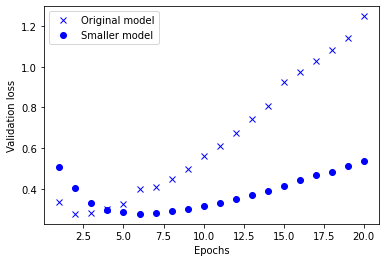

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x = range(1, 21)
plt.plot(x, history_old.history['val_loss'], 'bx', label='Original model')
plt.plot(x, history_new.history['val_loss'], 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

> As you can see, the smaller network starts overfitting later than the reference one
(after 6 epochs rather than 4) and its performance degrades much more slowly once it
starts overfitting.

从上图你可以看到，较小的网络会比原始有着较大容量的网络更晚开始出现过拟合（从第六次迭代开始而不是从第四次迭代开始），并且在开始过拟合后它的性能下降比较大网络要慢许多。

> Now, for kicks, let’s add to this benchmark a network that has much more capacity,
far more than the problem would warrant:

下面，为了更进一步的对比，让我们试验一个更大容量的网络，远远超过本问题所需要的容量：

In [10]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_big = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 237us/sample - loss: 0.4470 - accuracy: 0.8063 - val_loss: 0.3081 - val_accuracy: 0.8705
Epoch 2/20
15000/15000 [==============================] - 3s 179us/sample - loss: 0.1950 - accuracy: 0.9242 - val_loss: 0.3349 - val_accuracy: 0.8699
Epoch 3/20
15000/15000 [==============================] - 3s 181us/sample - loss: 0.0815 - accuracy: 0.9727 - val_loss: 0.3797 - val_accuracy: 0.8883
Epoch 4/20
15000/15000 [==============================] - 3s 195us/sample - loss: 0.0398 - accuracy: 0.9897 - val_loss: 0.5692 - val_accuracy: 0.8848
Epoch 5/20
15000/15000 [==============================] - 3s 179us/sample - loss: 0.0822 - accuracy: 0.9889 - val_loss: 0.5303 - val_accuracy: 0.8869
Epoch 6/20
15000/15000 [==============================] - 3s 178us/sample - loss: 0.0435 - accuracy: 0.9919 - val_loss: 0.6263 - val_accuracy: 0.8753
Epoch 7/20
15000/15000 [==========================

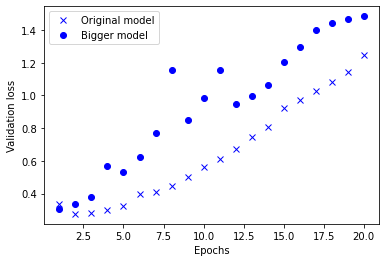

In [11]:
plt.plot(x, history_old.history['val_loss'], 'bx', label='Original model')
plt.plot(x, history_big.history['val_loss'], 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

> The bigger network starts overfitting almost right away, after just one epoch, and
overfits much more severely. Its validation loss is also more noisy.

更大的网络几乎一开始就过拟合了，仅仅过了一次迭代而已，并且过拟合的程度更加严重。它的验证损失也比较杂乱无章。

> Meanwhile, here are the training losses for our two networks:

与此同时，我们来看一下两个网络的训练损失情况：

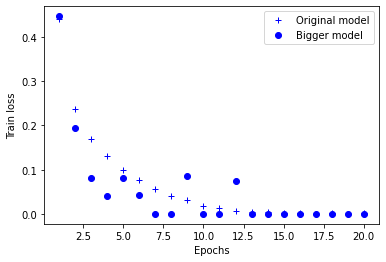

In [12]:
plt.plot(x, history_old.history['loss'], 'b+', label='Original model')
plt.plot(x, history_big.history['loss'], 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Train loss')
plt.legend()

> As you can see, the bigger network gets its training loss near zero very quickly. The
more capacity the network has, the quicker it will be able to model the training data
(resulting in a low training loss), but the more susceptible it is to overfitting (resulting in
a large difference between the training and validation loss).

你可以看到，更大的网络很快能使得训练损失接近零值。网络的容量越大，它就能越快的拟合训练数据，但是更容易产生过拟合（导致训练损失和验证损失之间的巨大误差）。

#### 增加权重正则化

> You may be familiar with Occam’s Razor principle: given two explanations for
something, the explanation most likely to be correct is the "simplest" one, the one that
makes the least amount of assumptions. This also applies to the models learned by neural
networks: given some training data and a network architecture, there are multiple sets of
weights values (multiple models ) that could explain the data, and simpler models are less
likely to overfit than complex ones.

你可能熟悉奥卡姆剃刀原则：对于某个事物有两种解释的话，最简单的那种解释最有可能是正确的，因为它是使用了最少假设的那个解释。这个原则也可以应用到神经网络的模型训练过程上：给定训练数据和一个网络结构，可以有多种可能的权重数量方案（不同的模型）能够解释数据，更简单的模型更加不容易导致过拟合。

> A "simple model" in this context is a model where the where the distribution of
parameter values has less entropy (or a model with fewer parameters altogether, as we
saw in the section above). Thus a common way to mitigate overfitting is to put
constraints on the complexity of a network by forcing its weights to only take small
values, which makes the distribution of weight values more "regular". This is called
"weight regularization", and it is done by adding to the loss function of the network a
cost associated with having large weights. This cost comes in two flavors:

> - L1 regularization, where the cost added is proportional to the absolute value of the
weights coefficients (i.e. to what is called the "L1 norm" of the weights).
- L2 regularization, where the cost added is proportional to the square of the value of the
weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2
regularization is also called weight decay in the context of neural networks. Don’t let the
different name confuse you: weight decay is mathematically the exact same as L2
regularization.

这里一个“更简单的模型”指的是一个参数的分布具有更少的熵的模型（或者说一个模型有着更少的参数，正如前面小节介绍的那样）。因此有一个通用的方法来抑制过拟合，通过限制模型的参数只能使用较小的数值来减低模型的复杂度，这会使得模型权重值的分布更加的“正规”。我们将这种方法称为“权重正则化”，正则化方法通过在模型的损失函数中增加一个与其大权重参数相关的惩罚来实现。这个惩罚可以有两种：

- L1正则化，增加的惩罚与权重系数的绝对值成比例（也叫做权重的“L1范数”）。
- L2正则化，增加的惩罚与权重系统的平方成比例（也叫作权重的“L2范数”）。L2正则化在神经网络的上下文中也经常被叫做权重衰减。不要让这个名称迷惑了：权重衰减在数学上完全等同于L2正则化。

> In Keras, weight regularization is added by passing weight regularizer instances to
layers as keyword arguments. Let’s add L2 weight regularization to our movie review
classification network:

在Keras当中，权重正则化是通过在层当中增加一个关键字参数的权重正则实例实现的。让我们在我们影评分类网络中增加权重正则化：

In [13]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,),
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_l2_reg = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 87us/sample - loss: 0.5122 - accuracy: 0.8135 - val_loss: 0.3826 - val_accuracy: 0.8758
Epoch 2/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.3145 - accuracy: 0.9057 - val_loss: 0.3490 - val_accuracy: 0.8739
Epoch 3/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.2520 - accuracy: 0.9275 - val_loss: 0.3165 - val_accuracy: 0.8880
Epoch 4/20
15000/15000 [==============================] - 2s 127us/sample - loss: 0.2228 - accuracy: 0.9401 - val_loss: 0.3353 - val_accuracy: 0.8815
Epoch 5/20
15000/15000 [==============================] - 1s 82us/sample - loss: 0.2043 - accuracy: 0.9457 - val_loss: 0.3480 - val_accuracy: 0.8777
Epoch 6/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.1901 - accuracy: 0.9516 - val_loss: 0.3709 - val_accuracy: 0.8771
Epoch 7/20
15000/15000 [==============================]

> l2(0.001) means that every coefficient in the weight matrix of the layer will add
0.001 * weight_coefficient_value to the total loss of the network. Note that
because this penalty is only added at training time , the loss for this network will be much
higher at training than at test time.

`l2(0.001)`表示权重矩阵中的每个系数都会将网络的总损失增加`0.001 * 权重系数值`的惩罚。注意这个惩罚只会在训练过程中增加，因此这个模型的损失在训练中会大大高于在测试情况中。

> Here’s the impact of our L2 regularization penalty:

下面展示了L2正则化惩罚的影响：

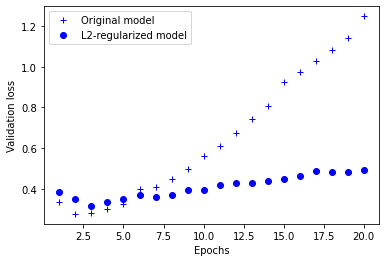

In [14]:
plt.plot(x, history_old.history['val_loss'], 'b+', label='Original model')
plt.plot(x, history_l2_reg.history['val_loss'], 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

> As you can see, the model with L2 regularization (dots) has become much more
resistant to overfitting than the reference model (crosses), even though both models have
the same number of parameters.

如上图所示，使用了L2正则化（圆点）的模型比参考的原始模型（×号）对于过拟合有着更强的抑制作用，尽管两个模型有着相同数量的参数。

> As alternatives to L2 regularization, you could use one of the following Keras weight
regularizers:

除了L2正则化外，Keras还提供了下面的权重正则化方法：

In [15]:
# L1正则化
regularizers.l1(0.001)

# 同时进行L1和L2正则化
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 增加Dropout

> Dropout is one of the most effective and most commonly used regularization techniques
for neural networks, developed by Hinton and his students at the University of Toronto.
Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a
number of output features of the layer during training. Let’s say a given layer would
normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample
during training; after applying dropout, this vector will have a few zero entries distributed
at random, e.g. [0, 0.5, 1.3, 0, 1.1] . The "dropout rate" is the fraction of the
features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no
units are dropped out, and instead the layer’s output values are scaled down by a factor
equal to the dropout rate, so as to balance for the fact that more units are active than at
training time.

Dropout是神经网络中最有效和最常用的正则化技巧，它是Hinton和他在多伦多大学的学生共同发明的。Dropout被应用到层上，包含着在训练中随机的“丢弃”（也就是设置为0）的层的输出特征值。比方说一个层通常在一个输入训练样本的情况下会返回一个向量$[0.2, 0.5, 1.3, 0.8, 1.1]$；使用了dropout之后，这个向量中就会存在着随机选择的零值，例如$[0, 0.5, 1.3, 0, 1.1]$。“丢弃比例”决定着多少占比的特征会被填充为零值；通常被设置为0.2到0.5之间。在测试阶段，没有单元会被丢弃，而是将该层的输出值缩小，缩小的比例等于丢弃的比例，使用这种方式来平衡测试时更多的隐藏单元参与了运算。

> Consider a Numpy matrix containing the output of a layer, layer_output , of shape
(batch_size, features) . At training time, we would be zero-ing out at random a
fraction of the values in the matrix:

考虑一下一个Numpy矩阵`layer_output`包含着层的输出，它有着形状(batch_size, features)。在训练阶段，我们会按照比例随机将该矩阵的值设置为零：

In [ ]:
# 在训练时，会将50%的输出值设置为0，伪代码，无法运行
import numpy as np
layer_output *= np.random.randint(0, 2, layer_output.shape)

> At test time, we would be scaling the output down by the dropout rate. Here we scale
by 0.5 (because we were previous dropping half the units):

在测试阶段，我们会将输出值减少相应的丢弃比率。这里是0.5（因为我们之前丢弃了一半的隐藏单元）：

In [ ]:
# 在测试时，会将输出值全部缩小50%，伪代码，无法运行
layer_output *= 0.5

> Note that this process can be implemented by doing both operations at training time
and leaving the output unchanged at test time, which is often the way it is implemented in
practice:

当然我们也可以在训练阶段同时实现上面的两个操作，然后在测试阶段保持输出不变即可，这也是实践中通常使用的方法：

In [ ]:
# 在训练时同时完成两个操作，则模型在测试的时候就可以保持不动。伪代码，无法运行
layer_output *= np.random.randint(0, 2, layer_output.shape)
layer_output /= 0.5

![dropout](imgs/f4.8.jpg)

图4-8 Dropout在训练阶段随机丢弃了部分单元值，并按比例扩大了参数值，在测试阶段保持参数值不变

> This technique may seem strange and arbitrary. Why would this help reduce
overfitting? Geoff Hinton has said that he was inspired, among other things, by a fraud
prevention mechanism used by banks—in his own words: "I went to my bank. The tellers
kept changing and I asked one of them why. He said he didn’t know but they got moved
around a lot. I figured it must be because it would require cooperation between
employees to successfully defraud the bank. This made me realize that randomly
removing a different subset of neurons on each example would prevent conspiracies and
thus reduce overfitting" .

这个技巧看起来很奇怪和随意。为什么它能帮助减少过拟合？Geoff Hinton表示他是从银行防止舞弊诈骗的做法中获得的启示 - 用他的原话来说：“我去银行。发现出纳员不停的更替，于是我问了其中一个出纳员，他表示自己也不清楚原因，但是它们经常会进行更替。我发现这应该是与如果需要欺诈银行必须通过银行员工合作才能成功这个事实有关。这使得我想到如果随机的移除神经元的一小部分子集，能够预防神经元之间的合谋，从而减少过拟合”。

> The core idea is that introducing noise in the output values of a layer can break up
happenstance patterns that are not significant (what Hinton refers to as "conspiracies"),
which the network would start memorizing if no noise was present.

这里的核心思想是在层的输出值中引入噪音能够打破训练过程中偶然学习到的非重要的模式（也就是Hinton指的“合谋”），如果没有这些噪音，网络将会开始记忆这些模式。

> In Keras you can introduce dropout in a network via the Dropout layer, which gets
applied to the output of layer right before it, e.g.:

在Keras中你可以通过Dropout层来将dropout技巧带进网络，它将应用到前面一层的输出值之上，例如：

In [ ]:
# 伪代码，不能运行
model.add(layers.Dropout(0.5))

> Let’s add two Dropout layers in our IMDB network to see how well they do at
reducing overfitting:

让我们在IMDB网络中加入两个dropout层来观察它们如何减少过拟合：

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 19s 1ms/sample - loss: 0.6302 - accuracy: 0.6693 - val_loss: 0.5478 - val_accuracy: 0.8044
Epoch 2/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.5212 - accuracy: 0.8285 - val_loss: 0.4773 - val_accuracy: 0.8592
Epoch 3/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.4567 - accuracy: 0.8793 - val_loss: 0.4448 - val_accuracy: 0.8672
Epoch 4/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.4111 - accuracy: 0.8984 - val_loss: 0.4359 - val_accuracy: 0.8631
Epoch 5/20
15000/15000 [==============================] - 2s 114us/sample - loss: 0.3702 - accuracy: 0.9092 - val_loss: 0.4414 - val_accuracy: 0.8623
Epoch 6/20
15000/15000 [==============================] - 1s 48us/sample - loss: 0.3309 - accuracy: 0.9225 - val_loss: 0.4469 - val_accuracy: 0.8597
Epoch 7/20
15000/15000 [==============================]

> Let’s plot the results:

然后绘制结果：

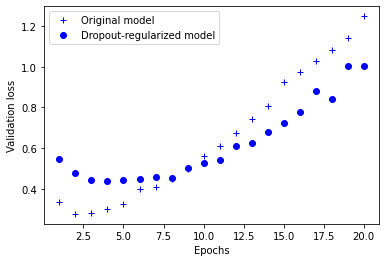

In [17]:
plt.plot(x, history_old.history['val_loss'], 'b+', label='Original model')
plt.plot(x, history_dropout.history['val_loss'], 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

> Again, a clear improvement over the reference network.
To recap: here the most common ways to prevent overfitting in neural networks:

> - Getting more training data.
- Reducing the capacity of the network.
- Adding weight regularization.
- Adding dropout.

再次可以看到和参照网络的过拟合比较有了明显改善。总结一下，在神经网络中预防过拟合的最通用方法包括：

- 获得更多训练数据。
- 减少网络的容量。
- 增加权重正则化。
- 增加dropout。

## 4.5 机器学习通用工作流

> What we present here is a universal blueprint you can use to attack and solve any
machine learning problem, tying together the different concepts you learned about in this
chapter: problem definition, evaluation, feature engineering, and fighting overfitting.

下面我们将会展示可以用来解决任何机器学习问题的通用蓝图，我们将会把本章中学习到的所有概念结合起来：定义问题、验证、特征工程和对抗过拟合。

### 4.5.1 定义问题和收集数据集

> First, you must define the problem at hand:

> - What will your input data will be? What will you be trying to predict? You can only learn
to predict something if you have available training data, e.g. you can only learn to
classify the sentiment of movie reviews if you have both movie reviews and sentiment
annotations available. As such, data availability is usually the limiting factor at this stage
(unless you have the means to pay people to collect data for you).
- What type of problem are you facing—is it binary classification? Multi-class
classification? Scalar regression? Vector regression? Multi-class, multi-label
classification? Something else, like clustering, generation or reinforcement learning?
Identifying the problem type will guide your choice of model architecture, loss function,
and so on.

首先你必须对手头的问题进行定义：

- 你的输入数据会是什么样的？你试图去预测的是什么？当你有了可用的训练数据时，你才可能对某类问题进行预测，例如只有当你有了影评数据和相应的情绪分类标签数据之后，你才能学习对影评积极消极情绪进行分类。因此数据的可用性通常是这个阶段的限制因素（除非你有途径花钱让人们为你收集数据）。
- 你正在面对的是哪种问题 - 是否二元分类？多类别分类？标量回归？向量回归？多类别多标签分类？其他如聚类、生成或者强化学习？确定问题的类别能够对你在模型结构、损失函数等等的选择上给出指导。

> You cannot move to the next stage until you know what your inputs and outputs are,
and what data you will be using. Be aware of the hypotheses that you are making at this
stage:

> - You are hypothesizing that your outputs can be predicted given your inputs.
- You are hypothesizing that your available data is sufficiently informative to learn the
relationship between inputs and outputs.

在你知道输入和输出以及你将要使用什么数据之前，无法进行下一步。在这个阶段要特别注意你做出的猜想和假设：

- 你猜测输出能够通过给定的输入进行预测。
- 你假设你手头可用的数据足够支撑在输入和输出之间学习到它们的关联。

> Until you have a working model, then these are merely hypotheses, waiting to be
validated or invalidated. Not all problems can be solved; just because you have
assembled examples of inputs X and targets Y doesn’t mean that X contains enough
information to predict Y. For instance, if you are trying to predict the movements of a
stock on the stock market given its recent price history, your are unlikely to succeed,
since price history simply doesn’t contain much predictive information.

在你获得一个工作良好的模型之前，这些都仅仅是假设，等待着被证实或者被证伪。不是所有的问题都能得到解决；仅仅由于你已经收集了输入X和目标Y的样本数据，并不意味着X包含了足够的信息来预测Y。例如，如果你试图依靠最近的价格历史数据预测股市上的股价波动，你很可能不会成功，因为价格数据并没有包含很多可预测的信息。

> One class of unsolvable problems of which you should be specifically aware is
non-stationary problems. Suppose that you are trying to build a recommendation engine
for clothing, and that you are training it on one month of data, August, and that you want
to start generating recommendations in the winter. One big issue is that the kind of
clothes that people buy changes from season to season, i.e. clothes buying is a
non-stationary phenomenon over the scale of a few months. What you are trying to
model changes over time. In this case the right move would be to constantly retrain your
model on data from the recent past, or gather data at a timescale where the problem is
stationary. For a cyclical problem like clothes buying, a few years worth of data would
suffice to capture seasonal variation—but then you should remember to make the time of
the year an input of your model!

有一种无法解决的问题类别你需要特别注意，那就是非稳态问题。假设你希望构建一个衣服的推荐引擎，然后你使用了一个月的数据来训练它，如八月，然后你希望能够在冬季生成推荐内容，这里的问题在于，购买衣服在几个月的区间上是一个非稳态现象。你希望建立的模型总是随着时间而变化。在这个场景中正确的做法是让你的模型持续的从最近收集到的数据中进行学习，或者采集足够时间跨度的数据使得问题称为稳态的。对于一个想购买衣服这样周期性的问题来说，几年的数据应该可以足够让你捕捉到季节的变化- 但是你应该记住将年份也作为你的模型输入。

> Keep it in mind: machine learning can only be used to memorize patterns which are
present in your training data. You can only recognize what you have seen before. Using
machine learning trained on past data to predict the future is making the assumption that
the future will behave like the past. That is often not the case.

牢记于心：机器学习只能够用来记忆你训练数据中展示的模式。你只能认得你已经见过的模式。使用机器学习在过去的数据上训练来预测未来，都默认假定未来会想过去一样演进。这通常都不正确。

### 4.5.2 选择衡量成功的指标

> To control something, you need to be able to observe it. To achieve success, you must
define what you mean by success—accuracy? Precision-Recall? Customer retention rate?
Your metric for success will guide the choice of your loss function, i.e. the choice of
what your model will optimize. It should directly align with your higher-level goals, such
as the success of your business.

要控制一件事情，你需要能够观察它。要获得成功，你必须定义成功的含义：准确率？精确度召回率？客户留存率？你对成功的指标将会指导损失函数的选择，也就是模型优化的选择。它应该与你的高层次目标相匹配，例如你商业上的成功标准。

> For balanced classification problems, where every class is equally likely, accuracy
and ROC-AUC are common metrics. For class-imbalanced problems, one may use
Precision-Recall. For ranking problems or multi-label classification, one may use Mean
Average Precision. And it isn’t uncommon to have to define your own custom metric by
which you will measure success. To get a sense of the diversity of machine learning
success metrics and how they relate to different problem domains, it is helpful to browse
data science competitions on Kaggle.com , as they showcase a wide range of different
problems and evaluation metrics.

对于平衡分类问题来说，也就是每个类别都平均分布的情况，准确率和ROC或AUC曲线是较常用的指标。对于非平衡分类问题来说，可以使用精确度召回率。对于排名问题或者多标签分类问题来说，可以使用平均精度。并且自定义指标来衡量成功也并不罕见。要了解机器学习成功指标的分类知识以及它们对应的不同问题领域，可以浏览数据科学竞赛网站[Kaggle.com](https://kaggle.com)，上面展示了覆盖了广泛的问题领域和验证指标。

### 4.5.3 确定一个验证规则

> Once you know what you are aiming for, you must establish how you will measure your
current progress. We have previously reviewed three common evaluation protocols:

> - Maintaining a hold-out validation set; this is the way to go when you have plenty of data.
- Doing K-fold cross-validation; this is the way to go when you have too few samples for
hold-out validation to be reliable.
- Doing iterated K-fold validation; this is for performing highly accurate model evaluation
when little is available.

当你确定好目标之后，你必须建立一个机制来测量训练过程的性能。我们前面已经介绍了三种主要的验证规则：

- 维护一个留出验证集；这是当你有着大量数据时候的自然选择。
- 使用K折交叉验证；这是当你的数据不足以采用留出验证集的情况下使用的方法。
- 使用迭代K折验证；这是当数据不足且你需要进行高度精确的模型验证的情况下使用的方法。

> Just pick one of these; in most cases the first one will work well enough.

从上面中选择一个；在大多数情况下第一个方式就可以满足你的需要。

### 4.5.4 准备数据

> Once you know what you are training on, what you are optimizing for, and how to
evaluate your approach, you are almost ready to start training models. But first, you
should format your data in a way that can be fed into a machine learning model—here we
will assume a deep neural network.

> - As we saw previously, your data should be formatted as tensors.
- The values taken by these tensors should almost typically be scaled to small values, e.g.
in the [-1, 1] range or [0, 1] range.
- If different features take values in different ranges (heterogenous data), then the data
should be normalized.
- You may want to do some feature engineering, especially for small data problems.

这时候你已经知道你需要训练的内容了，你想要优化的是什么，如何能够验证你的方法，你已经快可以开始训练模型了。不过首先，你应该将数据转换成能够输入到机器学习模型当中的格式：这里我们假定的都是一个深度神经网络。

- 正如前面看到的，你的数据应该被格式化为张量。
- 这些张量中的数值几乎都应该缩小成较小区间的数值，如$[-1, 1]$或$[0, 1]$的区间。
- 如果不同的特征采用了不同的取值区间（异质数据），那么这些数据需要进行标准化。
- 你可能需要进行一些特征工程，特别是对于较小的数据问题而言。

> Once your tensors of input data and target data are ready, you can start training
models.

一旦你准备好了输入数据和目标数据的张量，你就可以开始训练模型了。

### 4.5.5 构建一个比基线更好的网络

> Your goal at this stage is to achieve "statistical power", i.e. develop a small model that is
capable of beating a dumb baseline. In our MNIST digits classification example,
anything that gets an accuracy higher than 0.1 can be said to have statistical power; in our
IMDB example it would be anything with an accuracy higher than 0.5.

这个阶段你的目标是获得“统计超越”，也就是开发一个小型的模型，能够击败简朴的基线即可。在我们MNIST数字分类例子中，任何获得超过0.1的准确的方法都可以认为是具有统计超越；在我们IMDB例子中，那就是任何超过0.5准确率的方法。

> Note that it is not always possible to achieve statistical power. If you cannot beat a
random baseline after trying multiple reasonable architectures, it may be that the answer
to the question you are asking isn’t actually present in the input data. Remember that you
are making two hypotheses:

> - You are hypothesizing that your outputs can be predicted given your inputs.
- You are hypothesizing that your available data is sufficiently informative to learn the
relationship between inputs and outputs.

需要注意的是并不是任何情况下都能达到统计超越。如果当你尝试了很多种合理的架构之后，仍然无法击败随机的基线，那么可能是你所需要的问题答案并不体现在输入数据当中。请记住你作出了以下两个前提假设：

- 假设输出能够通过给定的输入获得。
- 假设你手头可用的数据具有足够的信息来学习到输入和输出之间的关联。

> It may well be that these hypotheses are false, in which case you would have to go
back to the drawing board.

上面两个假设都有可能最终被证伪的，无论哪个假设是否定的，你都必须回到白板上来重新规划你的问题了。

> Assuming that things go well—there are three keys choices you need to make in order
to build your first working model:

> - Choice of the last-layer activation. This establishes useful constraints on the network’s
output: for instance in our IMDB classification example we used sigmoid in the last
layer, in the regression example we didn’t use any last-layer activation, etc.
- Choice of loss function. It should match the type of problem you are trying to solve: for
instance in our IMDB classification example we used binary_crossentropy , in the
regression example we used mse , etc.
- Choice of optimization configuration: what optimizer will you use? What will its learning
rate be? In most cases it is safe to go with rmsprop and its default learning rate.

如果事情进行的顺利 - 下面就有三个关键的选择，直接关系着能否构建一个良好的模型：

- 选择最后一层的激活函数。这个选择会对你的模型的输出作出限定：比如在IMDB分类例子中我们使用`sigmoid`作为最后一层的激活函数，在回归的例子中我们在最后一层没有使用任何的激活函数等等。
- 选择损失函数。这个选择应该匹配你试图解决问题的类型：例如IMDB分类例子中我们使用`binary_crossentropy`，在回归例子中我们使用`mse`等等。
- 选择优化配置。你应该使用哪个优化器？它的学习率应该是多少？在很多情况下，使用rmsprop和他默认的学习率都是安全的选择。

> Regarding the choice of a loss function: note that it isn’t always possible to directly
optimize for the metric that measures success on a problem. Sometimes there is no easy
way to turn a metric into a loss function; loss functions, after all, need to be computable
given only a mini-batch of data (ideally, a loss function should be computable for as few
as a single data point) and need to be differentiable (otherwise you cannot use
backpropagation to train your network). For instance, the widely used classification
metric ROC-AUC (Receiver Operating Characteristic Area Under the Curve) cannot be
directly optimized. Hence in classification tasks it is common to optimize for a proxy
metric of ROC-AUC, such as crossentropy. In general, one can hope that the lower the
crossentropy gets, the higher the ROC-AUC will be.

关于损失函数的选择：要说明的是并不是所有的情况下都能找到直接优化测量问题解决成功度的方式。有时候将这个指标转换成损失函数是很困难的；损失函数归根结底来说，需要能够在小批量数据上是可计算的（理想情况下损失函数应该在单个数据点上也是可计算的），而且还应该是可微的（否则就不能应用反向传播来训练你的网络）。例如ROC-AUC是广泛使用的分类指标（接收者操作特征曲线下面积），但是它不能直接进行优化。因此在分类任务中，我们通常使用它的替代品来进行优化，例如交叉熵。在大部分情况下，可以认为越低的交叉熵会得到更高的ROC-AUC。

> Here is a table to help you pick a last-layer activation and a loss function for a few
common problem types:

下表列出了一些通用问题类型的最后层激活函数以及损失函数，帮助你进行选择：

| 问题类型 | 最后层激活函数 | 损失函数 |
| - | - | - |
| 二元分类 | sigmoid | binary_crossentropy |
| 多类别单标签分类 | softmax | categorical_crossentropy |
| 多类别多标签分类 | sigmoid | binary_crossentropy |
| 任意值回归 | None | mse |
| $[0, 1]$区间值回归 | sigmoid | mse 或者 binary_crossentropy |

### 4.5.6 扩展：开发一个过拟合的模型

> Once you have obtained a model that has statistical power, the question becomes: is your
model powerful enough? Does it have enough layers and parameters to properly model
the problem at hand? For instance, a network with a single hidden layer with 2 units
would have statistical power on MNIST, but would not be sufficient to solve the problem
well. Remember that the universal tension in machine learning is between optimization
and generalization; the ideal model is one that stands right at the border between
under-fitting and over-fitting; between under-capacity and over-capacity. To figure out
where this border lies, first you must cross it.

到这个阶段你已经有一个统计超越的模型了，现在问题就变成：你的模型是否足够强大？它是否有了足够的层和参数能够正确的表达手头的问题？例如，一个具有单个层其中两个隐藏单元的网络，就可以在MNIST问题上达到统计超越了，但是这肯定不足以很好的解决这个问题。回想一下机器学习中的核心问题是优化和泛化；理想的模型是介于欠拟合和过拟合之间的边界上；位于容量不足和容量太大之间。要找到边界在哪，首先你得跨越它。

> To figure out how big a model you will need, you must develop a model that overfits.
This is fairly easy:

> - Add layers.
- Make your layers bigger.
- Train for more epochs.

要找到你需要多大的模型，你需要开发一个过拟合的模型。这其实很容易：

- 增加更多的层。
- 将层变得更大。
- 进行更多次的迭代。

> Always monitor the training loss and validation loss, as well as the training and
validation values for any metrics you care about. When you see that the performance of
the model on the validation data starts degrading, you have achieved overfitting.

永远都需要监控训练损失和验证损失，再加上训练和验证中其它任何你关心的指标。当你看到模型的性能在验证集上开始下降时，就达到过拟合了。

> The next stage is to start regularizing and tuning your model, in order to get as close
as possible to the ideal model, that is neither underfitting nor overfitting.

下一个阶段就需要对你的模型进行正则化和调参，最终目标是获得尽可能理想的模型，它应该既不是欠拟合也不是过拟合。

### 4.5.7 正则化模型和调整超参数

> This is the part that will take you the most time: you will repeatedly modify your model,
train it, evaluate on your validation data (not your test data at this point), modify it
again... until your model is as good as it can get.

下面将是最花费时间的部分了：你会重复修改你的模型，再训练，在验证数据上进行验证（这里不要使用测试数据），再次修改模型......直到你的模型达到它能获得的最佳结果。

> These are some of things you should be trying:

> - Add dropout.
- Try different architectures, add or remove layers.
- Add L1 / L2 regularization.
- Try different hyperparameters (such as the number of units per layer, the learning rate of
the optimizer) to find the optimal configuration.
- Optionally iterate on feature engineering: add new features, remove features that do not
seem to be informative.

下面是你可以尝试的工作：

- 增加dropout。
- 尝试不同的架构，增加或减少层。
- 增加L1或L2正则化
- 尝试不同的超参数（例如每层隐藏单元的数量，优化器的学习率）来获得最优的配置。
- 选择性的进行一些特征工程：增加新的特征，去掉那些看起来没有什么信息量的特征。

> Be mindful of the following: every time you are using feedback from your validation
process in order to tune your model, you are leaking information about your validation
process into your model. Repeated just a few times, this is innocuous, but done
systematically over many iterations will eventually cause your model to overfit to the
validation process (even though no model is directly trained on any of the validation
data). This makes your evaluation process less reliable, so keep it in mind.

需要牢记下面的内容：每次你使用验证过程的反馈结果来调整模型，都会泄露部分验证数据信息到模型当中。重复进行这个过程几次，并不会造成太大危害。但如果重复进行很多次这样的过程，就会最终导致你的模型对验证数据产生过拟合（即使模型并没有直接在验证数据上进行训练）。这会导致验证的结果不可靠，请记住这一点。

> In summary, this is the universal workflow of machine learning:

> 1. Define the problem at hand and the data you will be training on; collect this data or
annotate it with labels if need be.
2. Choose how you will measure success on your problem. Which metrics will you be
monitoring on your validation data?
3. Determine your evaluation protocol: hold-out validation? K-fold validation? Which
portion of the data should you use for validation?
4. Develop a first model that does better than a basic baseline: a model that has
"statistical power".
5. Develop a model that overfits.
6. Regularize your model and tune its hyperparameters, based on performance on the
validation data.

总结来说，下面就是机器学习的通用工作流程：

1. 定义手头的问题和你将要进行训练数据；采集数据或者对数据标签进行标记。
2. 选择衡量问题成功的标准。在验证数据上面应该使用哪个指标来进行监控。
3. 指定验证规则：留出验证？K折验证？数据中的哪个部分应该用作验证？
4. 开发第一个模型，只需要比基线性能要强即可：也就是达到统计超越的模型。
5. 开发一个产生过拟合的模型。
6. 使用模型在验证数据上的性能来正则化模型和调整超参数。

> A lot of machine learning research tends to focus only on the last step—but keep in
mind the big picture.

很多机器学习的研究都聚焦在最后一步，对于你来说需要记住的是整体的图景。

<< [第三章：进入神经网络](Chapter3_Getting_started_with_neural_networks.ipynb) || [目录](index.md) || [第五章：计算机视觉中的深度学习](Chapter5_Deep_learning_for_computer_vision.ipynb) >>